In [1]:
import tensorflow as tf
from tensorflow.keras import models  , layers
import matplotlib.pyplot as plt

In [2]:
img_Size = 256
batch_Size = 32

In [3]:
dataset =    tf.keras.preprocessing.image_dataset_from_directory(
                "naah" , 
                shuffle = True,
                image_size = (img_Size,img_Size),
                batch_size = batch_Size,
            )

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

In [5]:
len(class_names)

3

In [6]:
len(dataset)

68

In [7]:
645 * 32

20640

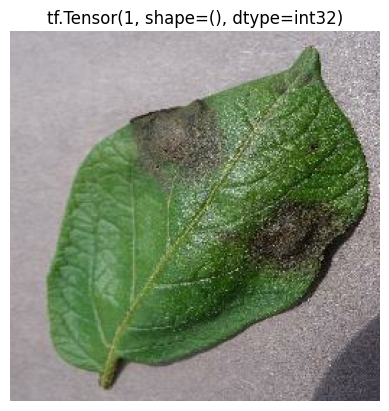

In [8]:
for image_batch  , label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")
    plt.title(label_batch[0])
    # print(image_batch[0])
    # print(label_batch.numpy())

In [9]:
def get_dataset_partitions_tf(ds , train_Split = 0.8 , test_split = 0.1 , val_split = 0.1 , shuffle = True , shuffle_size = 10000 ):
    
    if shuffle:
        dataset.shuffle(shuffle_size , seed =32)
    
    
    train_ds = dataset.take(int(len(dataset)*train_Split))
    val_ds = dataset.skip(int(train_Split*len(dataset))).take(int(val_split*len(dataset)))
    test_ds = dataset.skip(int(train_Split*len(dataset))).skip(int(test_split*len(dataset)))

    return train_ds , val_ds , test_ds

In [10]:
train_ds , val_ds , test_ds = get_dataset_partitions_tf(dataset)

In [11]:
len(train_ds)

54

In [12]:
train_ds = train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
from tensorflow.keras import layers
from tensorflow import keras

resize_and_rescale = keras.Sequential([
    layers.Resizing(img_Size, img_Size),
    layers.Rescaling(1.0 / 255)
])


In [14]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [15]:
from tensorflow.keras import layers, models

IMAGE_SIZE = 256
CHANNELS = 3
N_CLASSES = 3

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
], name="resize_and_rescale")

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
], name="data_augmentation")

model = models.Sequential([
    layers.InputLayer(input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    resize_and_rescale,
    data_augmentation,
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(N_CLASSES, activation='softmax')
])


c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
model.build((None, 256, 256, 3))  # Optional but safe
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resize_and_rescale (Sequential) │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:

history = model.fit(
    train_ds,
    batch_size=batch_Size,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 50s 653ms/step - accuracy: 0.4804 - loss: 0.9253 - val_accuracy: 0.7656 - val_loss: 0.6750
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 503ms/step - accuracy: 0.7805 - loss: 0.5952 - val_accuracy: 0.7812 - val_loss: 0.4275
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 523ms/step - accuracy: 0.9107 - loss: 0.2432 - val_accuracy: 0.8750 - val_loss: 0.3023
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 482ms/step - accuracy: 0.9236 - loss: 0.2025 - val_accuracy: 0.8490 - val_loss: 0.3654
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 470ms/step - accuracy: 0.9407 - loss: 0.1634 - val_accuracy: 0.7969 - val_loss: 0.4499
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 471ms/step - accuracy: 0.9720 - loss: 0.0712 - val_accuracy: 0.9531 - val_loss: 0.0956
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 482ms/step - accuracy: 0.9623 - loss: 0.0977 - val_accuracy: 0.9219 - val_loss: 0.2774
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 469ms/step - accuracy: 0.9649 - loss: 0.0936 - val_accu

In [19]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.9531 - loss: 0.1194


In [20]:
scores

[0.07128169387578964, 0.9698275923728943]

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

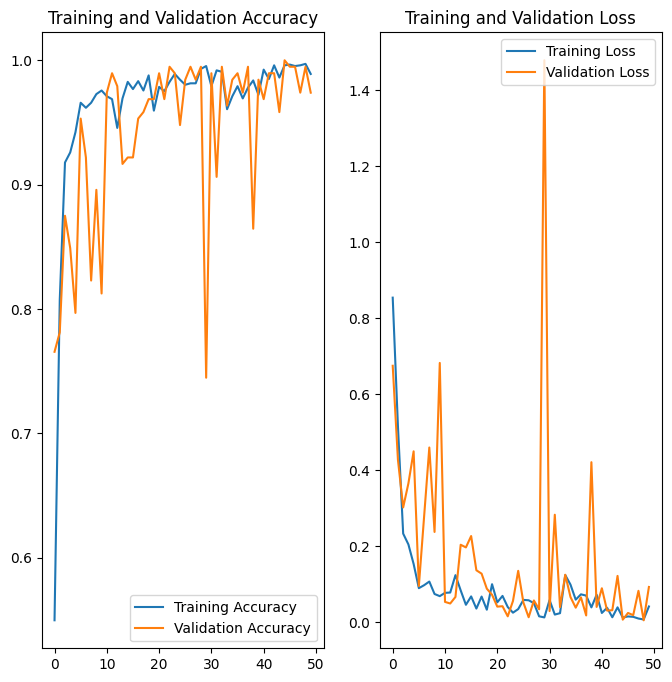

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
epoch = 50 
plt.plot(range(epoch), acc, label='Training Accuracy')
plt.plot(range(epoch), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epoch), loss, label='Training Loss')
plt.plot(range(epoch), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
predicted label: Potato___Early_blight


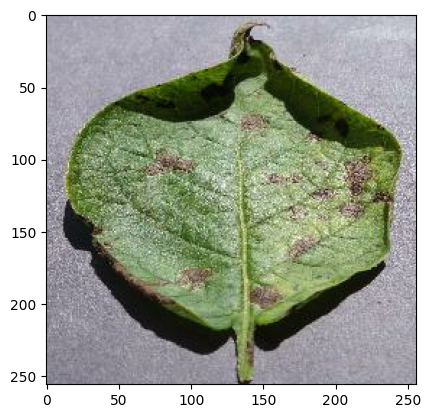

In [24]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


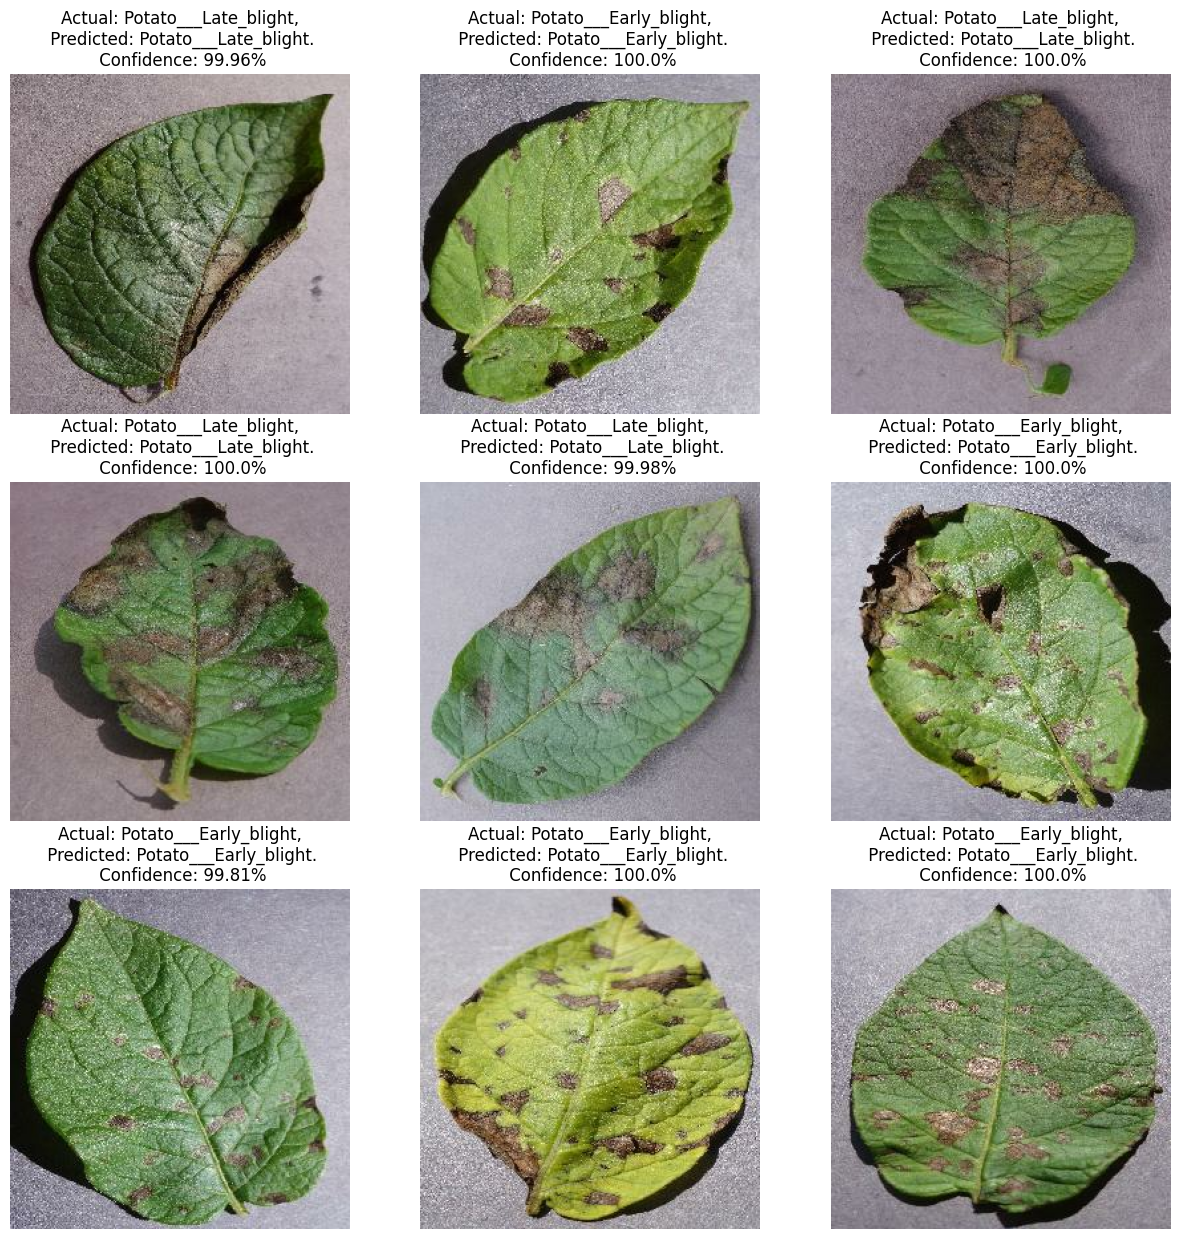

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [39]:
import os

# Set model version and path
model_version = 1
models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)  # ✅ create the folder if it doesn't exist

# Save the model
model.save(os.path.join(models_dir, f"{model_version}.keras"))
print(f"Model saved to: {os.path.join(models_dir, f'{model_version}.keras')}")


Model saved to: ../models\1.keras


In [31]:
import os

# Get the path to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Define the model file path
model_path = os.path.join(desktop_path, "my_model.h5")

# Save the model
model.save(model_path)

print(f"Model saved to: {model_path}")


Model saved to: C:\Users\anshu\Desktop\my_model.h5


In [ ]:
import os

# Path to Desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")

# Folder name for your model
model_folder = os.path.join(desktop_path, "completemodel")

# Save the model in TensorFlow SavedModel format
model.export(model_folder)

print(f"Model successfully saved at: {model_folder}")


INFO:tensorflow:Assets written to: C:\Users\anshu\Desktop\alpha\assets


INFO:tensorflow:Assets written to: C:\Users\anshu\Desktop\alpha\assets


Saved artifact at 'C:\Users\anshu\Desktop\alpha'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2364927363792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927362448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927366096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927366864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927367056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927366288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927368784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927367248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927369168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927368976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2364927366480: TensorS

In [34]:
model.save("C:/Users/anshu/Desktop/alpha.keras")


In [35]:
from keras.models import load_model
model = load_model("C:/Users/anshu/Desktop/alpha.keras")


c:\Users\anshu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 18 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [43]:
import os
from tensorflow import keras

# Correct desktop folder path
folder_path = "C:/Users/anshu/OneDrive/Desktop/models"
file_path = os.path.join(folder_path, "forapp.keras")

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

# Save the model
model.save(file_path)
print(f"✅ Model saved successfully at: {file_path}")


✅ Model saved successfully at: C:/Users/anshu/OneDrive/Desktop/models\forapp.keras


In [44]:
import tensorflow as tf

model = tf.keras.models.load_model("C:/Users/anshu/OneDrive/Desktop/models/forapp.keras")
